# Choosing the Policy Portfolio

### Optimal Asset Mix

When facing liabilities we discussed that an investor should hold two portfolios: PSP (Perfomance Seeking Portfolio) and LHP (Liability-Hedging Portfolio). At this stage the only outstanding question becomes: how much do we allocate to each of these portfolios?

### Risk-Aversion and Risk Budgets

In theory we could just use a risk-aversion parameter to decide how much we should allocate to each portfolio, where a more risk-averse investor would allocate more to the LHP and a less risk-averse investor would allocate more the PSP. However, this is just a mathematical quantity and doesn't exactly translate to anything in the real world, who's risk-aversion are we talking about when there are a multiplicity of stakeholders and investors?

The risk-aversion parameter should be thought of as a free parameter. And this free parameter will be translated in terms of risk budgets. We can try different allocation splits between the portfolios which will translate into different levels of volatility of the funding ratio, max drawdown of the funding ratio and max drawdown of the funding ratio just to name a few examples. In practice, asset owners tend to invest in performance seeking assets and the allocation to the PSP is always increasing untill the risk budget is exhausted. The risk budget is generally set by the stakeholders or agents acting on their behalf.

### Conflicts

There's a conflict usually between the short-term constraints and the long-term objectives. You can also think of this as a conflict between dollar and risk budgets, in other words, if you have very tight risk budgets and you can't or don't want to take on too much risk then that is going to imply that you're not going to be able to generate much upside. As a result of this you will have to come up with big dollar budgets, very high contribution levels for you to be able to achieve the target lavels that you have in mind.

### Solving the Dilemma

How can we succeed in generating upside performance whilst having only tight risk budgets? One may try and hide the problem by using a higher discount rate when discounting the liability value, use a higher risk premia value when we simulate the performance of the risky assets. However, this is just playing around with parameter values, it;s not exactly improving the current situation at hand. Alternatively, one may try and solve the problem by requesting a higher dollar budget (additional contribution), requesting a higher risk budget, improve the PSP.

# Lab Session - Monte Carlo Simulation of Coupon-Bearing Bonds using CIR

In [36]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

0    109.275393
dtype: float64

In [38]:
rates, zc_prices = erk.cir(10, 500, b = 0.03, r_0 = 0.03)

In [39]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[0][[1, 2, 3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [40]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[1][[1, 2, 3]])

1    110.144477
2    108.927690
3    109.203350
dtype: float64

In [41]:
rates[[1, 2, 3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.028222,0.030716,0.030148
2,0.029324,0.028848,0.030705
3,0.028980,0.030534,0.031987
4,0.030876,0.033130,0.030377


<AxesSubplot:>

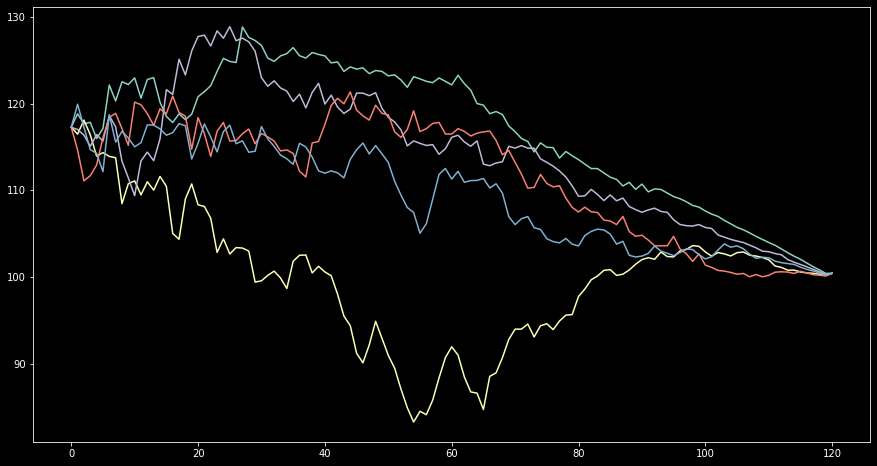

In [42]:
erk.bond_price(10, 100, 0.05, 12, rates[[1, 2, 3, 4, 5]]).plot(legend = False, figsize = (15, 8))

In [43]:
prices = erk.bond_price(10, 100, 0.05, 12, rates[[1, 2, 3, 4, 5]])
prices

,1,2,3,4,5
0,117.260292,117.260292,117.260292,117.260292,117.260292
1,118.81843,116.467632,116.99796,114.648524,119.919825
2,117.644188,118.090535,116.358988,111.084213,117.274339
3,117.835335,116.397259,115.070279,111.672609,114.683761
4,115.965175,113.937618,116.419733,112.909317,114.25988
...,...,...,...,...,...
116,101.596769,100.459023,101.158936,100.45732,100.864167
117,101.181433,100.415521,100.8781,100.259356,100.684323
118,100.801031,100.301875,100.579245,100.188836,100.455128
119,100.399813,100.172897,100.27187,100.104138,100.198523


In [44]:
br = prices.pct_change().dropna()
erk.annualise_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [50]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualise_rets(btr, 12)

1    0.027866
2    0.035362
3    0.028894
4    0.029871
dtype: object

In [51]:
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.596769,100.459023,101.158936
117,101.181433,100.415521,100.8781
118,100.801031,100.301875,100.579245
119,100.399813,100.172897,100.27187
120,100.416667,100.416667,100.416667


In [52]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,195.408764,119.96171,161.018563
117,193.139075,124.597026,161.582728
118,195.081484,127.041242,160.458671
119,194.439819,131.57386,155.381123
120,192.231058,131.334366,151.894216


In [53]:
price_30[[1,2,3]].head()

,1,2,3
0,139.531564,139.531564,139.531564
1,143.963133,137.706365,139.09762
2,141.080398,142.281899,137.66821
3,141.874954,138.019831,134.541166
4,137.125968,131.837684,138.335868


In [54]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = 0.6*rets_10 + 0.4*rets_30

In [55]:
mean_rets_bond = rets_bonds.mean(axis="columns")
erk.summary_stats(pd.DataFrame(mean_rets_bond))

,Annualised Return,Annualised Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035948,0.003578,0.561469,3.116078,-0.001417,-0.001165,1.617959,0.0


In [56]:
price_eq = erk.gbm_updated(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [57]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [58]:
rets_bonds.shape

(120, 500)

In [60]:
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis="columns")
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualised Return,Annualised Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.059485,0.004814,0.180401,2.766479,-0.002615,-0.002187,5.961585,0.0
